<h1># DECISION TREE TUTORIAL: CLASSIFICATION vs REGRESSION</h1>

In [37]:
# =============================================================================
# DECISION TREE TUTORIAL: CLASSIFICATION vs REGRESSION
# =============================================================================
# This tutorial demonstrates the difference between Decision Tree Classification 
# and Decision Tree Regression using student performance data.

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

print("=" * 70)
print("DECISION TREE: CLASSIFICATION vs REGRESSION TUTORIAL")
print("=" * 70)

DECISION TREE: CLASSIFICATION vs REGRESSION TUTORIAL


<h1># STEP 1: CREATE SYNTHETIC STUDENT DATASET</h1>

In [38]:

# =============================================================================
# STEP 1: CREATE SYNTHETIC STUDENT DATASET
# =============================================================================
print("\n📊 STEP 1: Creating synthetic student dataset...")

np.random.seed(42)  # For reproducible results
n_students = 500

# Generate student features
hours_studied = np.random.randint(0, 11, n_students)    # 0-10 hours per week
attendance = np.random.randint(40, 101, n_students)     # 40-100% attendance
sleep_hours = np.random.randint(4, 11, n_students)      # 4-10 hours per night

# Create realistic final scores with some noise
noise = np.random.normal(0, 5, n_students)
final_score = (hours_studied * 8) + (attendance * 0.3) + (sleep_hours * 2) + noise
final_score = np.clip(final_score, 0, 100)  # Keep scores between 0-100

# Create binary grade (Pass/Fail) based on final score
grade = np.where(final_score >= 50, 1, 0)  # 1=Pass, 0=Fail

# Create DataFrame
df = pd.DataFrame({
    'hours_studied': hours_studied,
    'attendance': attendance,
    'sleep_hours': sleep_hours,
    'final_score': final_score,
    'grade': grade
})

print(f"✅ Dataset created with {n_students} students")
print("\nSample of the dataset:")
print(df.head(10))
print(f"\nDataset shape: {df.shape}")
print(f"Pass rate: {(df['grade'].sum() / len(df) * 100):.1f}%")


📊 STEP 1: Creating synthetic student dataset...
✅ Dataset created with 500 students

Sample of the dataset:
   hours_studied  attendance  sleep_hours  final_score  grade
0              6          73            7    84.471138      1
1              3          90            5    61.751509      1
2             10          80           10   100.000000      1
3              7          46            4    77.515272      1
4              4          43            4    54.439009      1
5              6          97           10    88.549158      1
6              9          92            9   100.000000      1
7              2          89            5    56.416320      1
8              6          84            9    92.054327      1
9             10          50            7   100.000000      1

Dataset shape: (500, 5)
Pass rate: 77.2%


<h1># STEP 2: PREPARE FEATURES</h1>

In [39]:


# =============================================================================
# STEP 2: PREPARE FEATURES
# =============================================================================
print("\n🔧 STEP 2: Preparing features...")

# Features (independent variables)
X = df[['hours_studied', 'attendance', 'sleep_hours']]
print("Features:", X.columns.tolist())
print("Feature statistics:")
print(X.describe())


🔧 STEP 2: Preparing features...
Features: ['hours_studied', 'attendance', 'sleep_hours']
Feature statistics:
       hours_studied  attendance  sleep_hours
count      500.00000  500.000000   500.000000
mean         4.79400   70.702000     7.082000
std          3.16854   17.844833     2.030646
min          0.00000   40.000000     4.000000
25%          2.00000   55.750000     5.000000
50%          5.00000   70.500000     7.000000
75%          7.00000   87.000000     9.000000
max         10.00000  100.000000    10.000000


<h1 style="color:blue"># PART A: CLASSIFICATION PROBLEM</h1>

In [40]:

# =============================================================================
# PART A: CLASSIFICATION PROBLEM
# =============================================================================
print("\n" + "=" * 70)
print("PART A: CLASSIFICATION - PREDICTING PASS/FAIL")
print("=" * 70)
print("Goal: Predict if a student will PASS (1) or FAIL (0)")
print("Target variable: 'grade' (binary: 0 or 1)")


PART A: CLASSIFICATION - PREDICTING PASS/FAIL
Goal: Predict if a student will PASS (1) or FAIL (0)
Target variable: 'grade' (binary: 0 or 1)


<h1># Prepare classification data</h1>

In [41]:
# Prepare classification data
y_classification = df['grade']
print(f"\nClass distribution:")
print(f"Pass (1): {sum(y_classification == 1)} students ({sum(y_classification == 1)/len(y_classification)*100:.1f}%)")
print(f"Fail (0): {sum(y_classification == 0)} students ({sum(y_classification == 0)/len(y_classification)*100:.1f}%)")

# Split data for classification
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X, y_classification, test_size=0.2, random_state=42, stratify=y_classification
)

print(f"\nTraining set: {X_train_clf.shape[0]} students")
print(f"Test set: {X_test_clf.shape[0]} students")


Class distribution:
Pass (1): 386 students (77.2%)
Fail (0): 114 students (22.8%)

Training set: 400 students
Test set: 100 students


<h1># Train Classification Model</h1>

In [42]:

# Train Classification Model
print("\n🤖 Training Decision Tree Classifier...")
classifier = DecisionTreeClassifier(
    random_state=42,
    max_depth=5,  # Limit depth to avoid overfitting
    min_samples_split=10,  # Minimum samples to split a node
    min_samples_leaf=5     # Minimum samples in a leaf
)
classifier.fit(X_train_clf, y_train_clf)


🤖 Training Decision Tree Classifier...


DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

<h1># Make predictions and Results Analysis</h1>

In [43]:
# Make predictions
y_pred_clf = classifier.predict(X_test_clf)

# Create a DataFrame to display inputs, actual, and predicted values
results_df = X_test_clf.copy()  # Start with the input features
results_df['Actual'] = y_test_clf.values  # Add actual values
results_df['Predicted'] = y_pred_clf  # Add predicted values

# Print the table
print("\nInputs, Actual vs Predicted:")
print(results_df.head(10))  # Display the first 10 rows


Inputs, Actual vs Predicted:
     hours_studied  attendance  sleep_hours  Actual  Predicted
446              9          96            6       1          1
281              2          80            7       1          0
62               5          67           10       1          1
28               0          88            7       0          0
108              0          46            7       0          0
174             10          83            4       1          1
213              7          77            8       1          1
413              9          71            5       1          1
125              6          84           10       1          1
37               4          94            6       1          1


<h1># Evaluate Classification Model</h1>


📈 CLASSIFICATION RESULTS:
Accuracy: 91.00%

Confusion Matrix:
[[20  3]
 [ 6 71]]
   Predicted
     0    1
Actual 0: 20   3
       1: 6   71

Detailed Classification Report:
              precision    recall  f1-score   support

        Fail       0.77      0.87      0.82        23
        Pass       0.96      0.92      0.94        77

    accuracy                           0.91       100
   macro avg       0.86      0.90      0.88       100
weighted avg       0.92      0.91      0.91       100



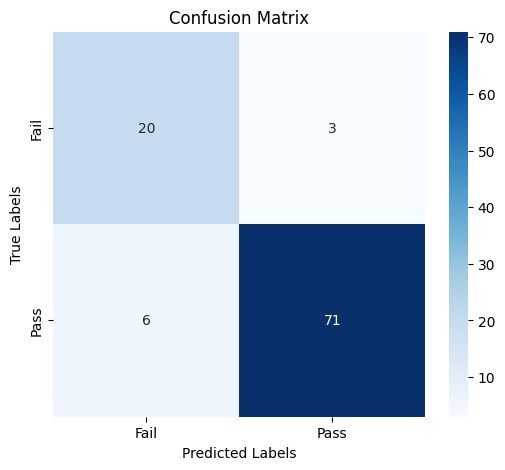

In [44]:
# Evaluate Classification Model
print("\n📈 CLASSIFICATION RESULTS:")
accuracy = accuracy_score(y_test_clf, y_pred_clf)
print(f"Accuracy: {accuracy*100:.2f}%")

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test_clf, y_pred_clf)
print(cm)
print("   Predicted")
print("     0    1")
print(f"Actual 0: {cm[0,0]}   {cm[0,1]}")
print(f"       1: {cm[1,0]}   {cm[1,1]}")

print("\nDetailed Classification Report:")
print(classification_report(y_test_clf, y_pred_clf, target_names=['Fail', 'Pass']))

# Plot confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

<h1 style="color:blue"># PART B: REGRESSION PROBLEM</h1>

In [45]:
# =============================================================================
# PART B: REGRESSION PROBLEM
# =============================================================================
print("\n" + "=" * 70)
print("PART B: REGRESSION - PREDICTING EXACT SCORES")
print("=" * 70)
print("Goal: Predict the exact FINAL SCORE (0-100)")
print("Target variable: 'final_score' (continuous numeric value)")



PART B: REGRESSION - PREDICTING EXACT SCORES
Goal: Predict the exact FINAL SCORE (0-100)
Target variable: 'final_score' (continuous numeric value)


<h1># Prepare regression data</h1>

In [46]:
# Prepare regression data
y_regression = df['final_score']
print(f"\nScore statistics:")
print(f"Mean score: {y_regression.mean():.2f}")
print(f"Min score: {y_regression.min():.2f}")
print(f"Max score: {y_regression.max():.2f}")
print(f"Standard deviation: {y_regression.std():.2f}")


Score statistics:
Mean score: 71.86
Min score: 15.20
Max score: 100.00
Standard deviation: 24.07


<h1># Split data for regression</h1>

In [47]:
# Split data for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X, y_regression, test_size=0.2, random_state=42
)

print(f"\nTraining set: {X_train_reg.shape[0]} students")
print(f"Test set: {X_test_reg.shape[0]} students")



Training set: 400 students
Test set: 100 students


<h1># Train Regression Model</h1>

In [48]:
# Train Regression Model
print("\n🤖 Training Decision Tree Regressor...")
regressor = DecisionTreeRegressor(
    random_state=42,
    max_depth=5,  # Limit depth to avoid overfitting
    min_samples_split=10,  # Minimum samples to split a node
    min_samples_leaf=5     # Minimum samples in a leaf
)
regressor.fit(X_train_reg, y_train_reg)


🤖 Training Decision Tree Regressor...


DecisionTreeRegressor(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                      random_state=42)

<h1>Make predictions and Results Analysis/Interpretation</h1>

In [49]:
# Make predictions
y_pred_reg = regressor.predict(X_test_reg)

# Create a DataFrame to display inputs, actual, and predicted values
results_df = X_test_reg.copy()  # Start with the input features
results_df['Actual'] = y_test_reg.values  # Add actual values
results_df['Predicted'] = y_pred_reg  # Add predicted values

# Print the table
print("\nInputs, Actual vs Predicted:")
print(results_df.head(10))  # Display the first 10 rows


Inputs, Actual vs Predicted:
     hours_studied  attendance  sleep_hours      Actual  Predicted
361              9          90            8  100.000000  99.987768
73               6          51            9   72.995195  75.115831
374              7          56            4   80.441994  83.079704
155              6          67            6   76.108514  82.308711
104              6          83            8   86.313558  95.776344
394              4          87            6   69.146588  69.202713
377              1          43            8   37.159729  48.150747
124              9          87            4  100.000000  99.987768
68               9          86            7  100.000000  99.987768
450              3          86            9   74.721364  65.747943


<h1># Evaluate Regression Model</h1>

In [50]:
# Evaluate Regression Model
print("\n📈 REGRESSION RESULTS:")
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.3f}")
print(f"Mean Absolute Error: {np.mean(np.abs(y_test_reg - y_pred_reg)):.2f}")

print(f"\nInterpretation:")
print(f"- RMSE of {rmse:.1f} means predictions are typically off by ±{rmse:.1f} points")
print(f"- R² of {r2:.3f} means the model explains {r2*100:.1f}% of score variance")


📈 REGRESSION RESULTS:
Mean Squared Error (MSE): 36.92
Root Mean Squared Error (RMSE): 6.08
R² Score: 0.938
Mean Absolute Error: 4.38

Interpretation:
- RMSE of 6.1 means predictions are typically off by ±6.1 points
- R² of 0.938 means the model explains 93.8% of score variance


<h1># STEP 3: COMPARE PREDICTIONS ON NEW STUDENTS</h1>

In [51]:
# =============================================================================
# STEP 3: COMPARE PREDICTIONS ON NEW STUDENTS
# =============================================================================
print("\n" + "=" * 70)
print("STEP 3: MAKING PREDICTIONS FOR NEW STUDENTS")
print("=" * 70)



STEP 3: MAKING PREDICTIONS FOR NEW STUDENTS


<h1># Create new student data</h1>

In [52]:
# Create new student data
new_students = np.array([
    [8, 90, 7],  # High performer: 8 hrs study, 90% attendance, 7 hrs sleep
    [3, 60, 5],  # Average performer: 3 hrs study, 60% attendance, 5 hrs sleep
    [1, 45, 4],  # Low performer: 1 hr study, 45% attendance, 4 hrs sleep
    [10, 95, 8]  # Excellent performer: 10 hrs study, 95% attendance, 8 hrs sleep
])

student_profiles = [
    "High performer",
    "Average performer", 
    "Low performer",
    "Excellent performer"
]


<h1># Make predictions with both models</h1>

In [53]:
# Make predictions with both models
classification_pred = classifier.predict(new_students)
regression_pred = regressor.predict(new_students)

print("New Student Predictions:")
print("-" * 80)
print(f"{'Student':<20} {'Study(h)':<10} {'Attend(%)':<10} {'Sleep(h)':<10} {'Pred.Score':<12} {'Pred.Grade':<12}")
print("-" * 80)

for i in range(len(new_students)):
    study, attend, sleep = new_students[i]
    score = regression_pred[i]
    grade_text = 'PASS' if classification_pred[i] == 1 else 'FAIL'
    
    print(f"{student_profiles[i]:<20} {study:<10} {attend:<10} {sleep:<10} {score:<12.1f} {grade_text:<12}")


New Student Predictions:
--------------------------------------------------------------------------------
Student              Study(h)   Attend(%)  Sleep(h)   Pred.Score   Pred.Grade  
--------------------------------------------------------------------------------
High performer       8          90         7          99.0         PASS        
Average performer    3          60         5          56.2         PASS        
Low performer        1          45         4          36.0         FAIL        
Excellent performer  10         95         8          100.0        PASS        


<h1>print("KEY DIFFERENCES: CLASSIFICATION vs REGRESSION")</h1>

In [54]:

# =============================================================================
# KEY DIFFERENCES SUMMARY
# =============================================================================
print("\n" + "=" * 70)
print("KEY DIFFERENCES: CLASSIFICATION vs REGRESSION")
print("=" * 70)

print("\n🔍 CLASSIFICATION:")
print("   • Predicts CATEGORIES (Pass/Fail, Yes/No, Class A/B/C)")
print("   • Output: Discrete labels (0, 1, 2, etc.)")
print("   • Evaluation: Accuracy, Precision, Recall, F1-score")
print("   • Example: Will this student pass or fail?")

print("\n📊 REGRESSION:")
print("   • Predicts CONTINUOUS VALUES (scores, prices, temperatures)")
print("   • Output: Real numbers (67.5, 89.2, 45.7, etc.)")
print("   • Evaluation: MSE, RMSE, R², MAE")
print("   • Example: What exact score will this student get?")

print("\n💡 WHEN TO USE WHICH:")
print("   • Use CLASSIFICATION when you need to assign categories")
print("   • Use REGRESSION when you need to predict exact numerical values")
print("   • Same dataset can be used for both by changing the target variable!")

print("\n✅ Tutorial completed successfully!")
print("=" * 70)


KEY DIFFERENCES: CLASSIFICATION vs REGRESSION

🔍 CLASSIFICATION:
   • Predicts CATEGORIES (Pass/Fail, Yes/No, Class A/B/C)
   • Output: Discrete labels (0, 1, 2, etc.)
   • Evaluation: Accuracy, Precision, Recall, F1-score
   • Example: Will this student pass or fail?

📊 REGRESSION:
   • Predicts CONTINUOUS VALUES (scores, prices, temperatures)
   • Output: Real numbers (67.5, 89.2, 45.7, etc.)
   • Evaluation: MSE, RMSE, R², MAE
   • Example: What exact score will this student get?

💡 WHEN TO USE WHICH:
   • Use CLASSIFICATION when you need to assign categories
   • Use REGRESSION when you need to predict exact numerical values
   • Same dataset can be used for both by changing the target variable!

✅ Tutorial completed successfully!


<h1>Model Saving</h1>

In [56]:
# Save the models for future use
import joblib

# Save the classification model
joblib.dump(classifier, 'model/decision_tree_classifier.pkl')

# Save the regression model
joblib.dump(regressor, 'model/decision_tree_regressor.pkl')

print("Models saved successfully!")

Models saved successfully!


<h1>Laod and make Model evaluation</h1>

In [57]:
# Load the models
import joblib

# Load the classification model
loaded_classifier = joblib.load('model/decision_tree_classifier.pkl')

# Load the regression model
loaded_regressor = joblib.load('model/decision_tree_regressor.pkl')

# New student data for predictions
new_students = np.array([
    [8, 90, 7],  # High performer: 8 hrs study, 90% attendance, 7 hrs sleep
    [3, 60, 5],  # Average performer: 3 hrs study, 60% attendance, 5 hrs sleep
    [1, 45, 4],  # Low performer: 1 hr study, 45% attendance, 4 hrs sleep
    [10, 95, 8]  # Excellent performer: 10 hrs study, 95% attendance, 8 hrs sleep
])

# Make predictions with the loaded models
classification_pred = loaded_classifier.predict(new_students)
regression_pred = loaded_regressor.predict(new_students)

# Display predictions
print("Loaded Model Predictions:")
print("-" * 80)
print(f"{'Student':<20} {'Study(h)':<10} {'Attend(%)':<10} {'Sleep(h)':<10} {'Pred.Score':<12} {'Pred.Grade':<12}")
print("-" * 80)

for i in range(len(new_students)):
    study, attend, sleep = new_students[i]
    score = regression_pred[i]
    grade_text = 'PASS' if classification_pred[i] == 1 else 'FAIL'
    
    print(f"{'Student ' + str(i+1):<20} {study:<10} {attend:<10} {sleep:<10} {score:<12.1f} {grade_text:<12}")

Loaded Model Predictions:
--------------------------------------------------------------------------------
Student              Study(h)   Attend(%)  Sleep(h)   Pred.Score   Pred.Grade  
--------------------------------------------------------------------------------
Student 1            8          90         7          99.0         PASS        
Student 2            3          60         5          56.2         PASS        
Student 3            1          45         4          36.0         FAIL        
Student 4            10         95         8          100.0        PASS        
